In [33]:
#importing Libraries :)

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, UpSampling1D, Dense, Dropout, Flatten
from tensorflow.keras.layers import Input, BatchNormalization, AveragePooling1D
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Activation,Layer,Lambda

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [34]:
#load dataset

dataset=pd.read_csv("breastcancerdataset.csv")

In [35]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
#Don't need id column and Unnamed:32 column
dataset=dataset.drop(["id","Unnamed: 32"],axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
dataset.shape

(569, 31)

In [38]:
#check for null values
pd.isnull(dataset).sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [39]:
y = dataset.iloc[:,0].values
x = dataset.drop(["diagnosis"],axis=1)

In [40]:
x.to_numpy()

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [41]:
x.shape

(569, 30)

In [42]:
print(y)
#encoding Categorical Data Turning 'y' values into numeric value
from sklearn.preprocessing import LabelEncoder
labelencoder_x= LabelEncoder()
y = labelencoder_x.fit_transform(y)
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [43]:
#spliting the dataset into train and test set

x_train,x_val,y_train,y_val= train_test_split(x,y,test_size = 0.1, random_state = 0)
x_train,x_test,y_train,y_test= train_test_split(x_train,y_train,test_size = 0.1, random_state = 0)

In [44]:
min_max_scaler = preprocessing.MinMaxScaler()

x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)
x_val = min_max_scaler.fit_transform(x_val)

print(x_train.shape,x_test.shape,x_val.shape)

(460, 30) (52, 30) (57, 30)


In [45]:
x_train = x_train.reshape(460, 30,1)
x_test = x_test.reshape(52, 30,1)
x_val = x_val.reshape(57, 30,1)

In [46]:
input_data = Input(shape=(30,))
encoded = Dense(3, activation='relu')(input_data)
decoded = Dense(30, activation='sigmoid')(encoded)

In [48]:
autoencoder = Model(input_data, decoded)
opt = keras.optimizers.Adam(lr=0.01)
autoencoder.compile(loss="mse",optimizer='Adam')
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 93        
_________________________________________________________________
dense_17 (Dense)             (None, 30)                120       
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = autoencoder.fit(x_train, x_train,epochs=500,shuffle=True,validation_data=(x_val, x_val))

Epoch 1/500
15/15 [==============================] - 0s 8ms/step - loss: 0.1050 - val_loss: 0.0875
Epoch 2/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1004 - val_loss: 0.0843
Epoch 3/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0957 - val_loss: 0.0814
Epoch 4/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0900 - val_loss: 0.0787
Epoch 5/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0834 - val_loss: 0.0767
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0761 - val_loss: 0.0759
Epoch 7/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0689 - val_loss: 0.0760
Epoch 8/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0623 - val_loss: 0.0769
Epoch 9/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0566 - val_loss: 0.0783
Epoch 10/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0519 - val_loss: 0.0796
Epoch 11/

15/15 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.0456
Epoch 84/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0159 - val_loss: 0.0454
Epoch 85/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 0.0450
Epoch 86/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0157 - val_loss: 0.0448
Epoch 87/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0156 - val_loss: 0.0447
Epoch 88/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.0445
Epoch 89/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0154 - val_loss: 0.0442
Epoch 90/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.0441
Epoch 91/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.0439
Epoch 92/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0152 - val_loss: 0.0437
Epoch 93/500


15/15 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.0359
Epoch 165/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.0357
Epoch 166/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.0356
Epoch 167/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0112 - val_loss: 0.0355
Epoch 168/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0112 - val_loss: 0.0356
Epoch 169/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0112 - val_loss: 0.0355
Epoch 170/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.0353
Epoch 171/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.0353
Epoch 172/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.0352
Epoch 173/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.0352
Epoc

15/15 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.0311
Epoch 246/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.0310
Epoch 247/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.0310
Epoch 248/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.0309
Epoch 249/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.0309
Epoch 250/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.0308
Epoch 251/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.0307
Epoch 252/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.0307
Epoch 253/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.0307
Epoch 254/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.0306
Epoc

15/15 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0273
Epoch 327/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.0272
Epoch 328/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0273
Epoch 329/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0272
Epoch 330/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0272
Epoch 331/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0271
Epoch 332/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0271
Epoch 333/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0270
Epoch 334/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0271
Epoch 335/500
15/15 [==============================] - 0s 5ms/step - loss: 0.0078 - val_loss: 0.0270
Epoc

15/15 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.0250
Epoch 408/500
15/15 [==============================] - 0s 6ms/step - loss: 0.0071 - val_loss: 0.0250
Epoch 409/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.0250
Epoch 410/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.0249
Epoch 411/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0250
Epoch 412/500
15/15 [==============================] - 0s 5ms/step - loss: 0.0070 - val_loss: 0.0249
Epoch 413/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0249
Epoch 414/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0248
Epoch 415/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0249
Epoch 416/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0248
Epoc

15/15 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0237
Epoch 489/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0237
Epoch 490/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0237
Epoch 491/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0237
Epoch 492/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0237
Epoch 493/500
15/15 [==============================] - 0s 5ms/step - loss: 0.0067 - val_loss: 0.0236
Epoch 494/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0237
Epoch 495/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0237
Epoch 496/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0236
Epoch 497/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0237
Epoc

In [50]:
evaluation = autoencoder.evaluate(x_test, x_test)

print("Loss:",evaluation)

2/2 [==============================] - 0s 3ms/step - loss: 0.0280
Loss: 0.027972081676125526


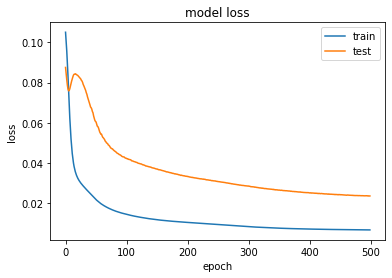

In [51]:
# Plot training loss and validation split loss over the epochs
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('ConvAE_model_loss.png')
plt.show()

In [52]:
autoencoder.evaluate(x_test, x_test)
#model.save('si_autoencoder.model')
data = autoencoder.predict(x_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0280


In [53]:
encoder = Model(input_data, encoded)
latent_vector_train = encoder.predict(x_train)
latent_vector = encoder.predict(x_test)

In [54]:
# Dimentionality reduction for 30 features to 3

x_test.shape

(52, 30, 1)

In [55]:
latent_vector.shape

(52, 3)

In [56]:
latent_vector = latent_vector.reshape(52, 3)
latent_vector_train = latent_vector_train.reshape(460, 3)

In [57]:
y_test

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1])

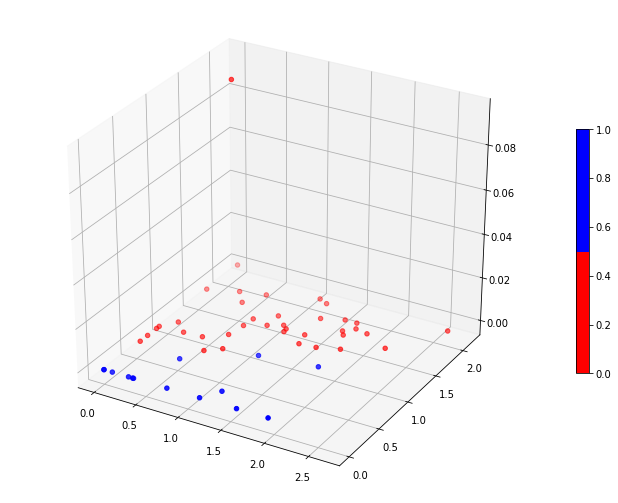

In [58]:
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d
colors=['red','blue']
plt.figure(figsize =(12, 9))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(latent_vector[:, 0], latent_vector[:, 1], latent_vector[:, 2], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
# Add a color bar which maps values to colors.
cb = plt.colorbar(surf, shrink=0.5, aspect=20)
plt.savefig('ConvAE_3d.png')
plt.show()

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knnscores = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(latent_vector_train, y_train)
    k = knn.score(latent_vector,y_test)
    knnscores.append(k)

s = np.array(knnscores)
result = np.where(s == s.max())
print('Knn Score : ',s.max(),'and k : ', result[0])

Knn Score :  0.8846153846153846 and k :  [1]


In [60]:
y_pred=knn.predict(latent_vector)

In [61]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(latent_vector)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Mean Absolute Error: 0.23076923076923078
Mean Squared Error: 0.23076923076923078
Root Mean Squared Error: 0.4803844614152614
[[26 12]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        38
           1       0.54      1.00      0.70        14

    accuracy                           0.77        52
   macro avg       0.77      0.84      0.76        52
weighted avg       0.88      0.77      0.78        52

